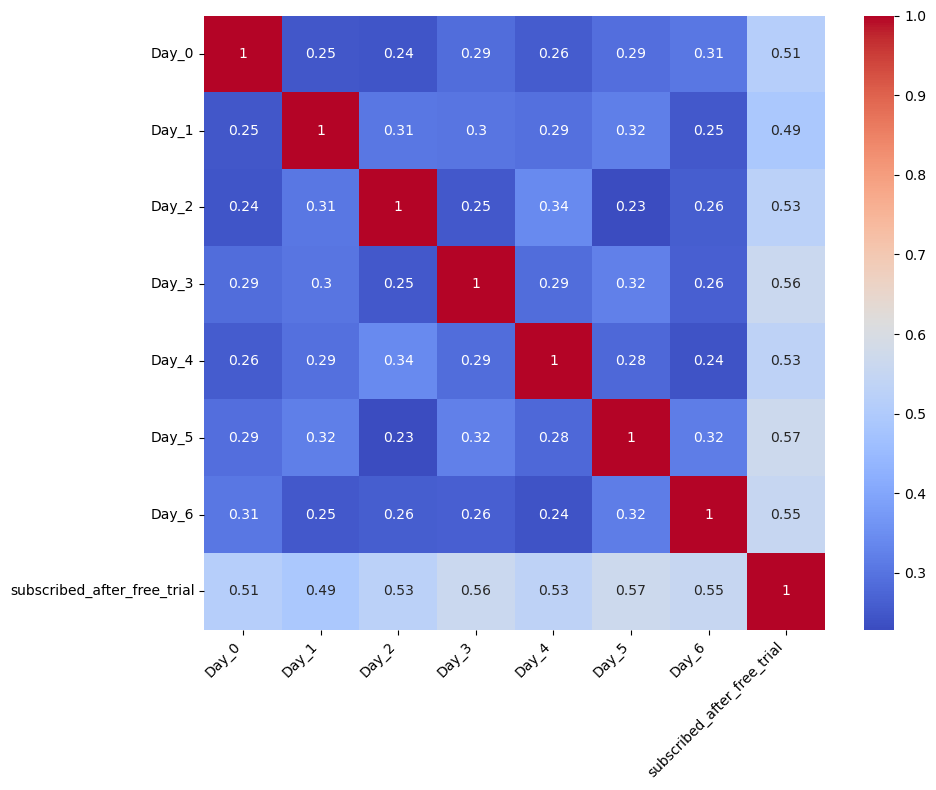

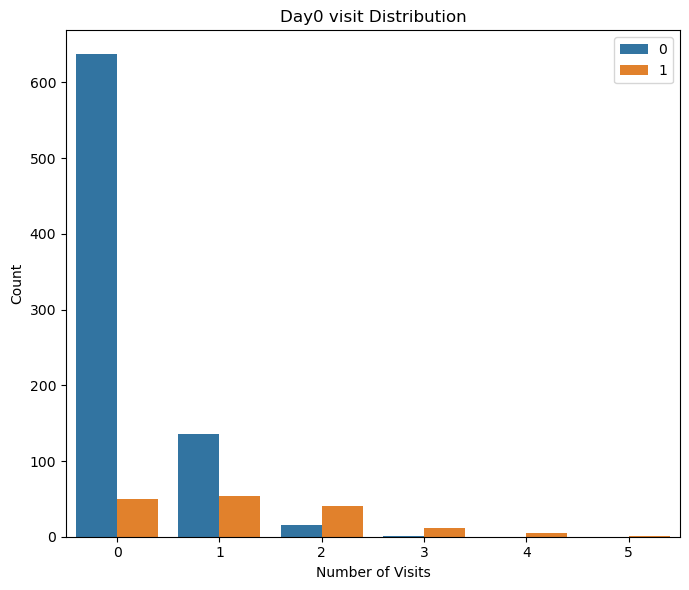

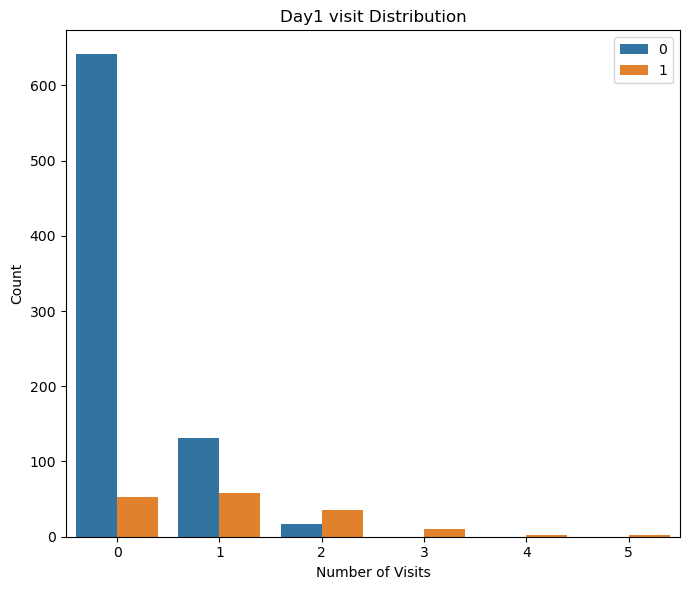

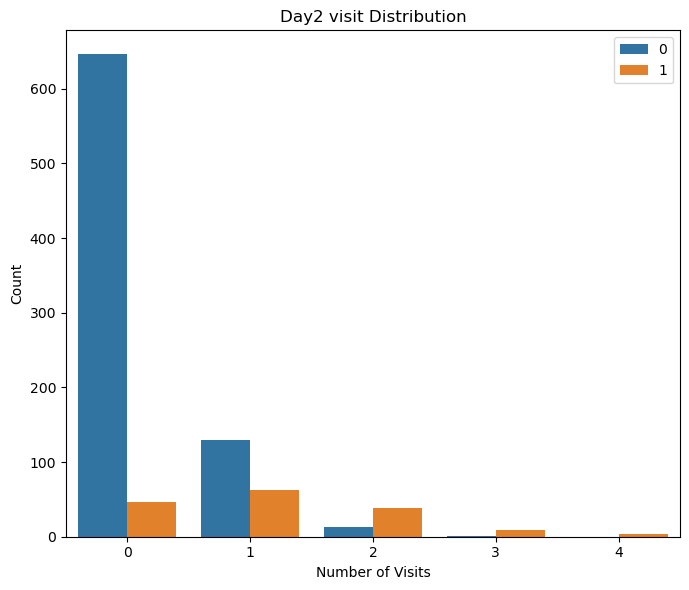

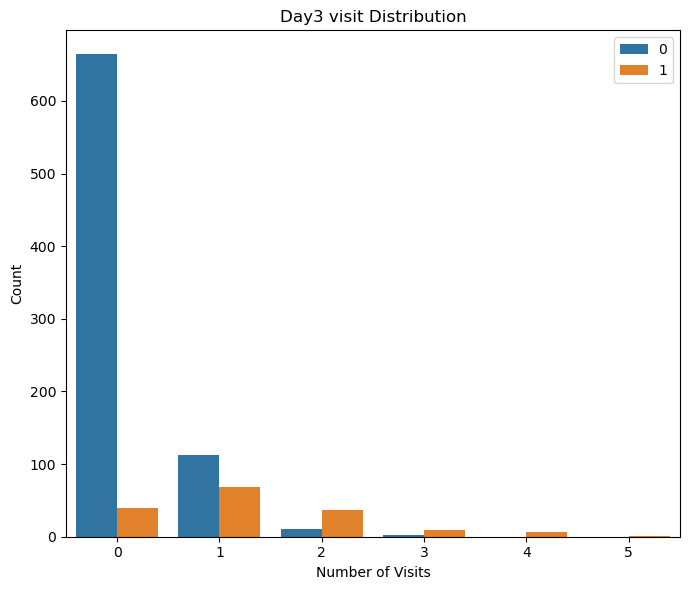

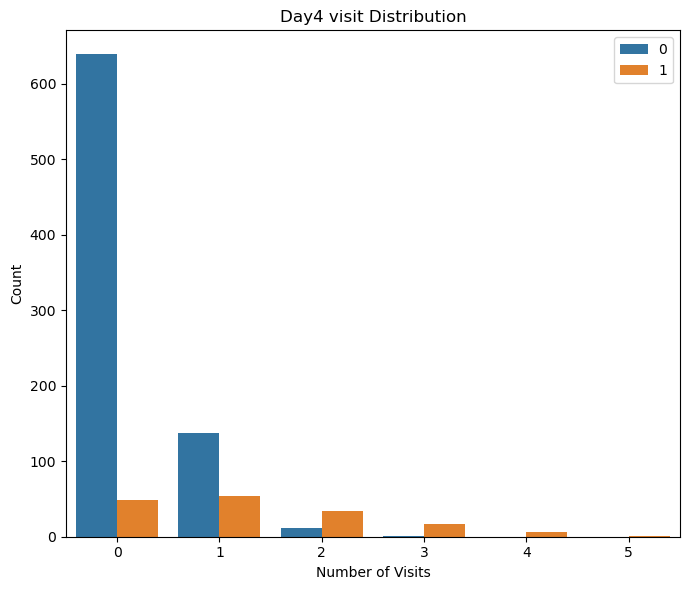

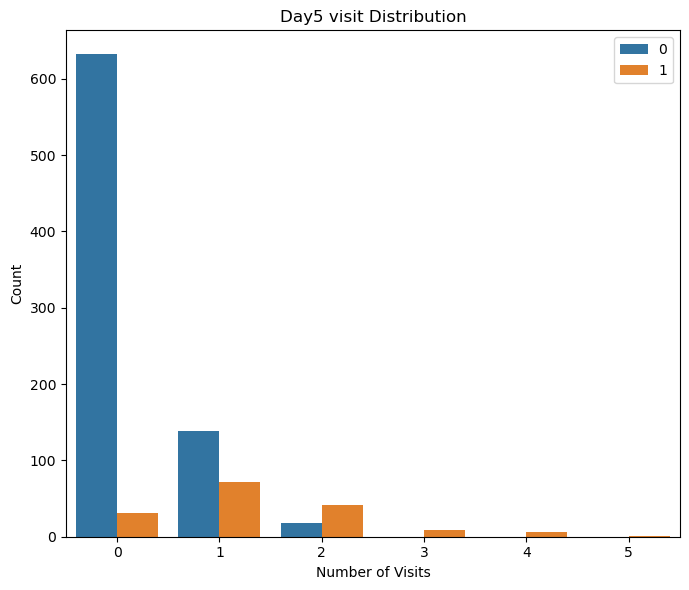

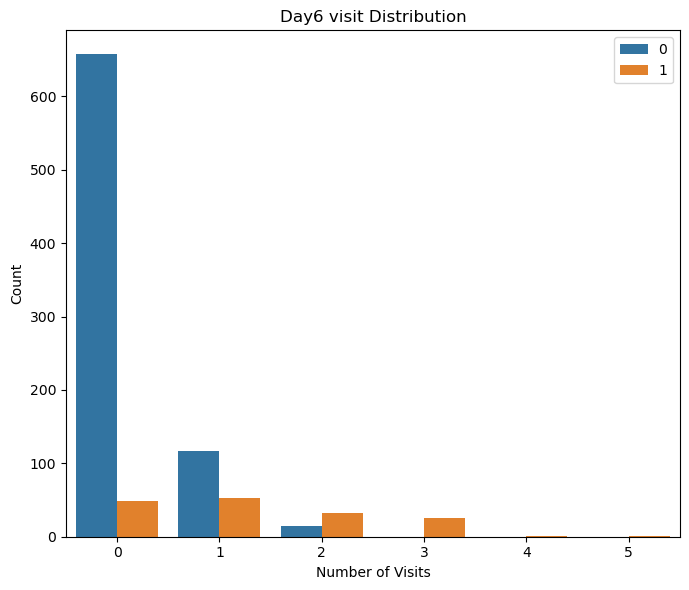

   Day_0  Day_1  Day_2  Day_3  Day_4  Day_5  Day_6
0     50     53   46.0     40     49     31     49
1     54     58   63.0     68     54     72     53
2     40     36   39.0     37     34     42     32
3     11     10    9.0      9     17      9     25
4      5      2    4.0      6      6      6      1
5      1      2    0.0      1      1      1      1 
    Day_0  Day_1  Day_2  Day_3  Day_4  Day_5  Day_6
0    637  641.0    646    664    639  632.0  657.0
1    136  131.0    129    113    137  139.0  117.0
2     15   17.0     13     10     12   18.0   15.0
3      1    0.0      1      2      1    0.0    0.0 
          company_type  Not Subscribed  Subscribed
0  uk_limited_company        0.794000    0.206000
1      uk_sole_trader        0.845714    0.154286
2   universal_company        0.960000    0.040000


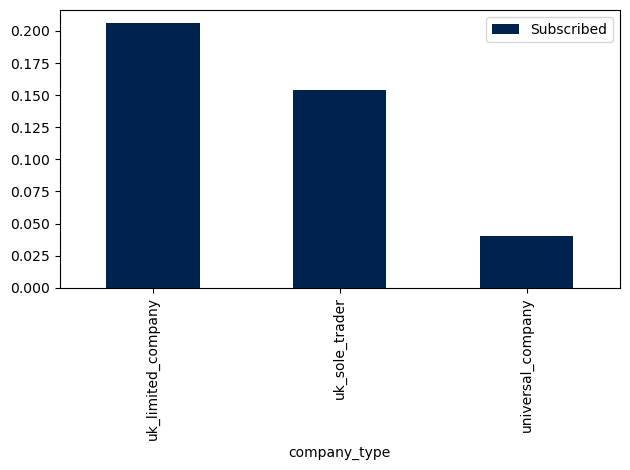

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


orig = pd.read_csv('report.csv')
tdata = pd.read_csv('title.csv')
tdata_trunc = tdata.iloc[:,4:11].copy()
tdata_false = tdata_trunc[tdata.subscribed_after_free_trial == 0]
tdata_true = tdata_trunc[tdata.subscribed_after_free_trial == 1]

corr = tdata.iloc[:,4:12].corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,
    fmt='.2g'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
);
plt.tight_layout()

plt.figure(figsize=(7,6))
sns.countplot(x="Day_0", hue="subscribed_after_free_trial", data=tdata)
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Day0 visit Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
sns.countplot(x="Day_1", hue="subscribed_after_free_trial", data=tdata)
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Day1 visit Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
sns.countplot(x="Day_2", hue="subscribed_after_free_trial", data=tdata)
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Day2 visit Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
sns.countplot(x="Day_3", hue="subscribed_after_free_trial", data=tdata)
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Day3 visit Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
sns.countplot(x="Day_4", hue="subscribed_after_free_trial", data=tdata)
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Day4 visit Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
sns.countplot(x="Day_5", hue="subscribed_after_free_trial", data=tdata)
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Day5 visit Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
sns.countplot(x="Day_6", hue="subscribed_after_free_trial", data=tdata)
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Day6 visit Distribution')
plt.tight_layout()
plt.show()


tt = tdata_true.apply(pd.Series.value_counts).fillna(0)
tf = tdata_false.apply(pd.Series.value_counts).fillna(0)


comp_counts = orig.set_index(["company_type"]).subscribed_after_free_trial.rename('Index') \
    .eq(True).groupby(level=[0]).value_counts(True).unstack(fill_value=0).reset_index()
comp_counts.columns=["company_type","Not Subscribed","Subscribed"]
ax = comp_counts.plot(x='company_type', y='Subscribed', colormap='cividis', kind='bar')
fig = ax.get_figure()
fig.tight_layout()

print(tt,"\n",tf,"\n",comp_counts)
